# Initialize

In [5]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import math

In [6]:
import classy_sz
classy_sz.__file__

'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

In [7]:
# font = {'size'   : 16, 'family':'STIXGeneral'}
# axislabelfontsize='large'
# matplotlib.rc('font', **font)
# plt.rcParams["figure.figsize"] = [8.0,8.0]
font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

In [8]:
Planck = {'name': 'Planck',
          'do_cib': 1, 'do_tsz': 1, 'do_cibxtsz': 1,
          'freq_cib': [100., 143., 217., 353., 545., 857.],
          'cc': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'cc_cibmean': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'freq_cibmean': np.array([100., 143., 217., 353., 545., 857.]),
          'fc': np.ones(7),
          }
# exp = Planck
# ell = np.geomspace(10., 5e4, 500)
# redshifts = np.loadtxt('data_files/redshifts.txt')
# z1 = np.linspace(min(redshifts), max(redshifts), 200)
# z = redshifts  # z1  # redshifts

# logmass = np.arange(8., 15.00, 0.05)

# print('len logmass',len(logmass))
# mass = 10**logmass

# driver = data_var(exp, mass, z, ell)

In [9]:
# Omegam0 = 0.3075
# H0 = 67.74
# Omegab = 0.0486
# Omegac = 0.2589
# Omegac + Omegab
# omega_b = Omegab*(H0/100.)**2
# omega_c = Omegac*(H0/100.)**2
# hparam = H0/100.
combo_cosmo = {
# 'omega_b': omega_b,
# 'omega_cdm':  omega_c,
# 'h': H0/100.,
# # 'tau_reio': 0.0561,
# 'ln10^{10}A_s': 3.048,
# 'n_s': 0.9665,
# # 'sigma8':0.830,
# 'k_pivot': 0.05,
# 'N_ncdm': 1,
# 'N_ur': 2.0328,
# 'm_ncdm': 0.0
    
                   'H0':67.556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   # 'sigma8': 0.831,
                   'ln10^{10}A_s': 3.047,
                   'n_s': 0.9665,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
}

In [10]:
%%time
M = Class()
output_str = 'cib_cib_1h,cib_cib_2h'
# output_str += ',lens_cib_1h,lens_cib_2h'
# output_str += ',gal_gal_1h,gal_gal_2h'
# output_str += ',gal_lens_1h,gal_lens_2h'
# output_str += ',gallens_lens_1h,gallens_lens_2h'
# output_str += ',gallens_gallens_1h,gallens_gallens_2h'
# output_str += ',tSZ_gallens_1h,tSZ_gallens_2h'
# output_str += ',gal_gallens_1h,gal_gallens_2h'
# output_str += ',gal_cib_1h,gal_cib_2h'
# output_str += ',gallens_cib_1h,gallens_cib_2h'
output_str += ',tSZ_1h,tSZ_2h'
# output_str += ',lens_1h,lens_2h'
# output_str += ',tSZ_gal_1h,tSZ_gal_2h'
# output_str += ',tSZ_lens_1h,tSZ_lens_2h'
output_str += ',tSZ_cib_1h,tSZ_cib_2h'
M.set({'output':output_str})
M.set(combo_cosmo)
M.set({

'mass function' : 'T08M200c',
'use_maniyar_cib_model':1,

'maniyar_cib_etamax' : 5.12572945e-01,

'maniyar_cib_zc' : 1.5,
'maniyar_cib_tau' : 8.25475287e-01,
'maniyar_cib_fsub' : 0.134*np.log(10.),
'Most_efficient_halo_mass_in_Msun' : 5.34372069e+12,
'Size_of_halo_masses_sourcing_CIB_emission' :  1.5583436676980493,
#for the Lsat tabulation:
'freq_min': 100,
'freq_max': 600,
'dlogfreq' : 0.3,

# 'concentration parameter':'B13', # this sets it to 5

'n_z_L_sat' :50,
'n_m_L_sat' :50,
'n_nu_L_sat':10,

'use_nc_1_for_all_halos_cib_HOD': 1,

'sub_halo_mass_function' : 'TW10',#'JvdB14',
'M_min_subhalo_in_Msun' : 1e5, # 1e5 see https://github.com/abhimaniyar/halomodel_cib_tsz_cibxtsz/blob/master/Cell_cib.py
'use_redshift_dependent_M_min': 0,
'M_min' : 1e10,
'M_max' : 1e15,
'z_min' : 0.05,
'z_max' : 5.,
'ell_min': 2.,
'ell_max':8000,
'dlogell':0.2,


'ndim_redshifts': 50,
'ndim_masses':100,

'has_cib_flux_cut': 0,
'hm_consistency':1,

# 'epsabs_L_sat': 1e-40,
# 'epsrel_L_sat': 1e-9,

# "P_k_max_1/Mpc": 50.,
# 'k_max_for_pk_class_sz':50.
    
'pressure profile':'B12',
'delta for electron pressure':'200c',
"concentration parameter":"D08",
    
'use_fft_for_profiles_transform' : 1,
    
    
'damping_1h_term' : 0,
    
# 'x_min_gas_density_fftw' : 1e-5,
# 'x_max_gas_density_fftw' : 1e2,
    
# 'n_k_pressure_profile' :50, # this is l/ls # default 80
# 'n_m_pressure_profile' :30, # default: 100, decrease for faster
# 'n_z_pressure_profile' :30, # default: 100, decrease for faster

# 'x_min_gas_pressure_fftw' : 1e-5,
# 'x_max_gas_pressure_fftw' : 1e2,
    
    
# 'k_min_samp_fftw' : 1e-3,
# 'k_max_samp_fftw' : 1e3,
# 'N_samp_fftw' : 1024,
    
'n_z_pressure_profile': 500,
'n_m_pressure_profile' : 500,
'n_l_pressure_profile' : 500,
})

M.set({
       'cib_frequency_list_num' : 1,
       'cib_frequency_list_in_GHz' : '150',
      })
M.compute_class_szfast()

CPU times: user 1min 18s, sys: 579 ms, total: 1min 19s
Wall time: 9.28 s


In [13]:
# cl_cib_cib = {'spec':M.cl_cib_cib(),'key':'cib x cib'}
# cl_lens_cib = {'spec':M.cl_lens_cib()['545'],'key':'cib x kc'}
# cl_gal_cib = {'spec':M.cl_gal_cib()['545'],'key':'g x cib'}
# cl_gal_gal = {'spec':M.cl_gg(),'key':'g x g'}
# cl_gal_lens = {'spec':M.cl_kg(),'key':'g x kc'}
# cl_lens_lens = {'spec':M.cl_kk(),'key':'kc x kc'}
# cl_gallens_gallens = {'spec':M.cl_kg_kg(),'key':'kg x kg'}
# cl_gal_gallens = {'spec':M.cl_ggamma(),'key':'kg x g'}
# cl_y_y = {'spec':M.cl_sz(),'key':'y x y'}
# cl_y_gal = {'spec':M.cl_yg(),'key':'g x y'}
# cl_y_lens = {'spec':M.cl_y_kcmb(),'key':'y x kc'}
# cl_y_cib = {'spec':M.cl_tSZ_cib()['545'],'key':'cib x y'}
# cl_gallens_lens = {'spec':M.cl_kg_k(),'key':'kg x kc'}

In [14]:
# M.cl_cib_cib()['545x545']
# M.cl_lens_cib()['545']

In [26]:
specs_dict = {
'cib x cib' : M.cl_cib_cib()['150x150'],
# 'cib x kc' : M.cl_lens_cib()['150'],
# 'g x cib' : M.cl_gal_cib()['150'],
# 'g x g' : M.cl_gg(),
# 'g x kc' : M.cl_kg(),
# 'kg x kg' : M.cl_kg_kg(),
'kg x g' : M.cl_ggamma(),
'y x y' : M.cl_sz(),
# 'g x y' : M.cl_yg(),
# 'y x kc' : M.cl_y_kcmb(),
# 'kc x kc' : M.cl_kk(),
'cib x y' : M.cl_tSZ_cib()['150'],
# 'kg x kc' : M.cl_kg_k(),
# 'kg x y' : M.cl_ykg(),
# 'kg x cib' : M.cl_kg_cib()['150'],
}

In [27]:
# M.cl_kg_cib()

In [34]:
# tsz units function (see e.g., https://github.com/ACTCollaboration/tilec/blob/master/tilec/fg.py)
TCMB = 2.7255 #Kelvin # 2.725 value in choi et al (vs 2.726) -- this has an effect on  chi2 of deltachi2 ~ 2
TCMB_uK = 2.7255e6 #micro-Kelvin
hplanck=6.626068e-34 #MKS
kboltz=1.3806503e-23 #MKS
def fsz(nu_ghz):
    nu = 1.e9*np.asarray(nu_ghz).astype(float)
    X = hplanck*nu/(kboltz*TCMB)
    resp = (X / np.tanh(X/2.0) - 4.0) * TCMB_uK # into uK_CMB units
    return resp

Text(0, 0.5, '$D_\\ell$ [Jy uK]')

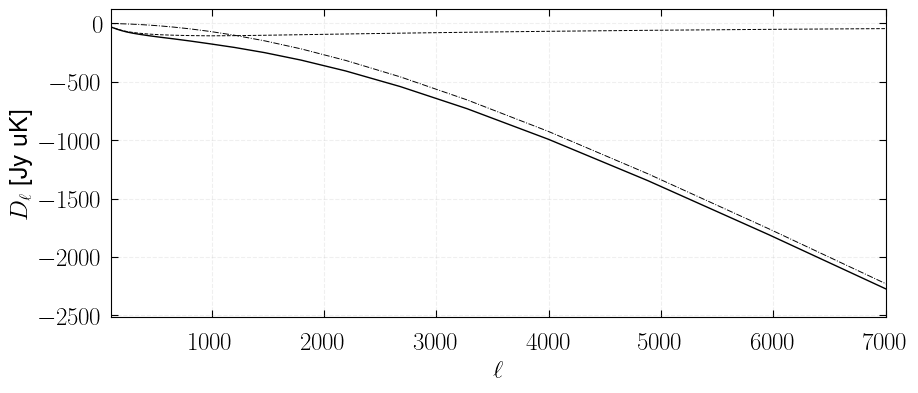

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=18)
plt.setp(ax.get_xticklabels(), fontsize=18)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
# ax.set_xscale("log")
# ax.set_yscale("log")


clsp = specs_dict['cib x y']
l = np.asarray(clsp['ell'])

nu = 150.
y_to_uK = fsz(nu)

ax.plot(l,np.asarray(clsp['1h'])*(1e-6*y_to_uK),
          ls='-.',c='k',label='class_sz 1h',lw=0.7)

ax.plot(l,np.asarray(clsp['2h'])*(1e-6*y_to_uK),
          ls='--',c='k',label='class_sz 2h',lw=0.7)

ax.plot(l,(np.asarray(clsp['2h'])+np.asarray(clsp['1h']))*(1e-6*y_to_uK),
        ls='-',c='k',label='class_sz Total',lw=1)
ax.set_xlim(100,7000)
plt.xlabel(r"$\ell$",fontsize=18)
plt.ylabel(r"$D_\ell$ [Jy uK]",fontsize=18)